Max Wang<br/>
PHYS 434 AB<br/>
Lab 2<br/>
Partner: Alexander Hyde<br/>

In [5]:
%matplotlib inline
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, signal


plt.rcParams["figure.figsize"] = (15,10)

## Problem 1

Assuming that in 1 day, the average cosmic-ray background we pick up using the Fermi telescope is **5**. We know that the noise precisely follows a Poisson distribution. Below is the PDF plot of the cosmic-ray background read for that particular day. 

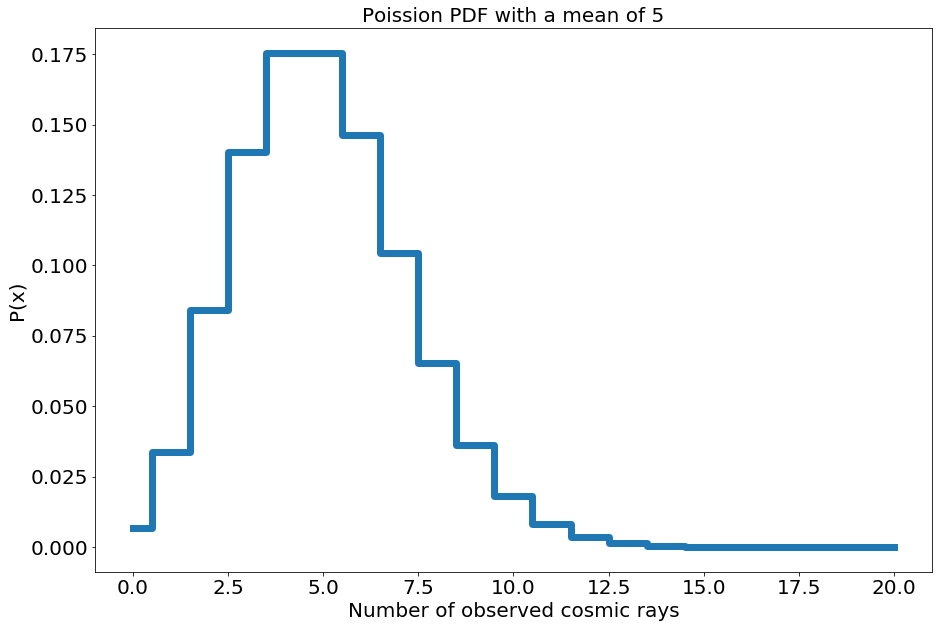

In [6]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 20, 21)
plt.step(x, stats.poisson.pmf(x, 5), where='mid', linewidth='7')
plt.tick_params(labelsize = 20)
plt.title('Poission PDF with a mean of 5', fontsize = 20)
plt.xlabel('Number of observed cosmic rays', fontsize = 20)
plt.ylabel('P(x)', fontsize = 20)
plt.show()

In [7]:
def conv_poi(n, avg):
    x = np.linspace(0, 20, 21)
    base = stats.poisson.pmf(x, 5)
    for i in range(n-1):
        base = signal.convolve(base, stats.poisson.pmf(x, 5))
    x = np.linspace(0, 20*n, (20*n)+1)
    if avg:
        x = np.linspace(0, 20, (20*n)+1)
    return x, base

**A)** Below is a series of graphs showing how the PMF of the cosmic-ray reading changes as we sum up more days of the distribution. We can see that the mean shifts to the right as number of days increase, and the distribution gradually widens. 

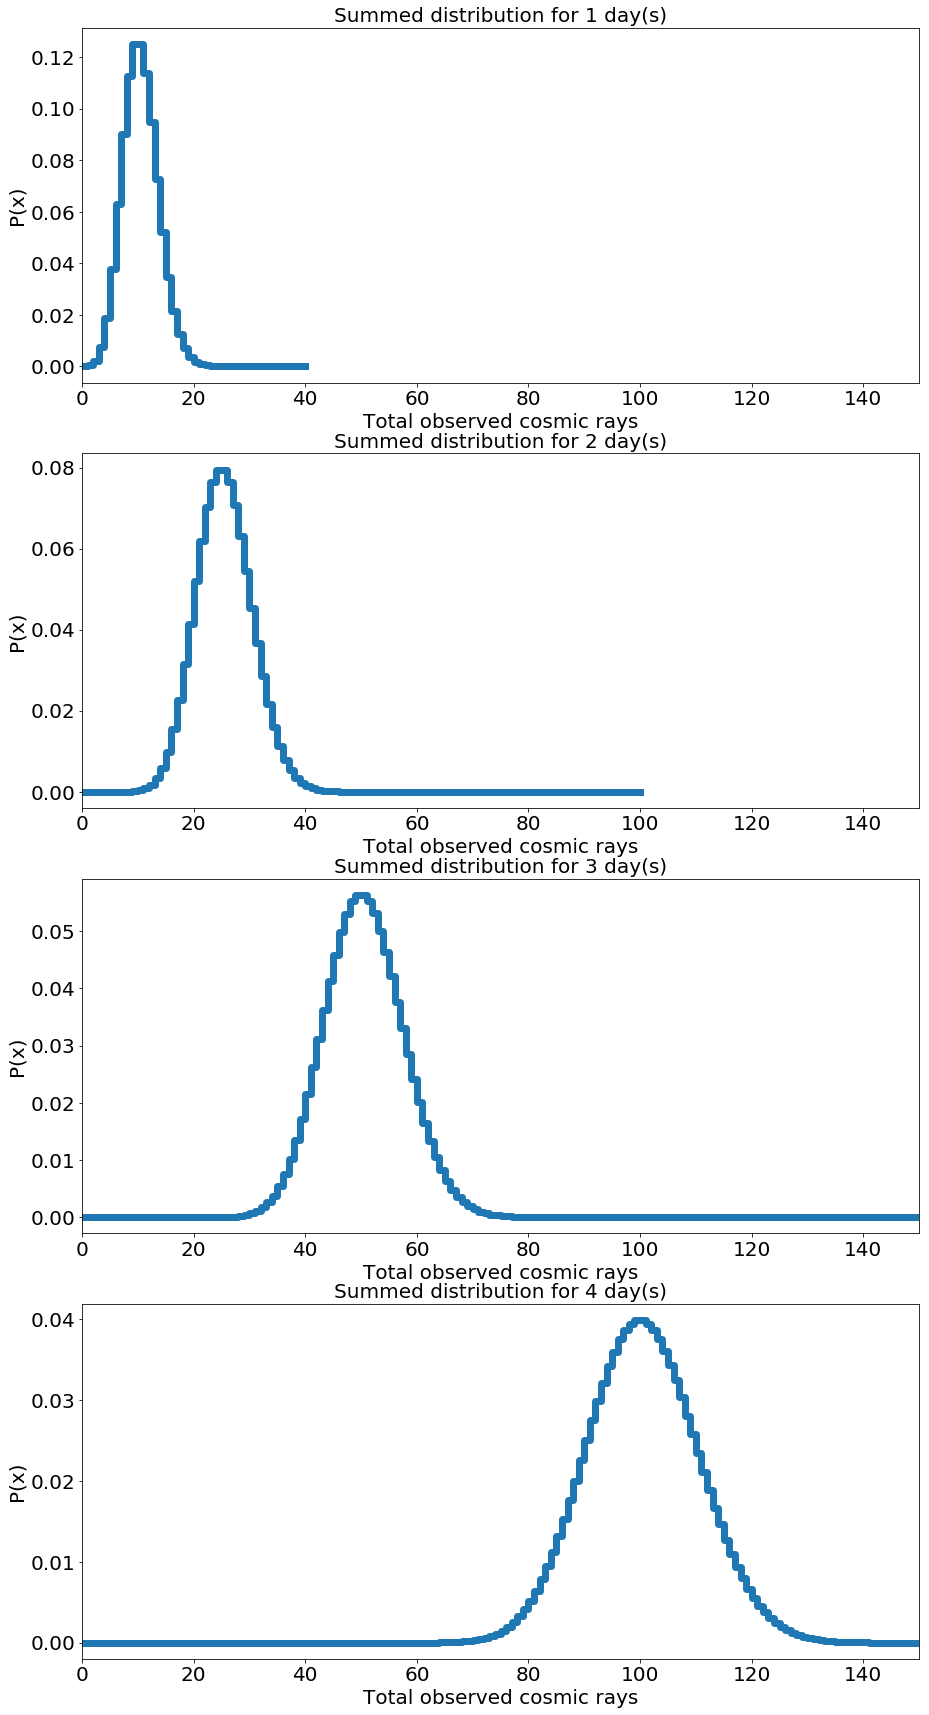

In [8]:
days = [2, 5, 10, 20]
fig, ax = plt.subplots(4,figsize=(15,30))
for i in range(len(days)):
    x, pmf = conv_poi(days[i], False)
    ax[i].step(x, pmf, where='post', linewidth='7')
    ax[i].tick_params(labelsize = 20)
    ax[i].set_xlim([0,150])
    ax[i].set_title('Summed distribution for ' + str(i+1) + ' day(s)', fontsize = 20)
    ax[i].set_xlabel('Total observed cosmic rays', fontsize = 20)
    ax[i].set_ylabel('P(x)', fontsize = 20)
plt.show()

**B)** To prove that summed probability distribution is still Poission, I picked the 5 days summed plot from the series above, and fitted a new Poisson distribution with an average equal to that of the 5 days summed distribution. Since I chose 5 for my average, the summed average would be 25.

The blue curve represents the summed distribution while the orange curve represents the Poission distribution made using the summed average. We can see the the two curves almost perfectly align. 

This makes sense mathematically, as each observation is independent of one another. Hence, when we sum two Poisson distributions together, we can use the sum property on the exponential term of the Poisson PMF, resulting in another Poisson distribution.

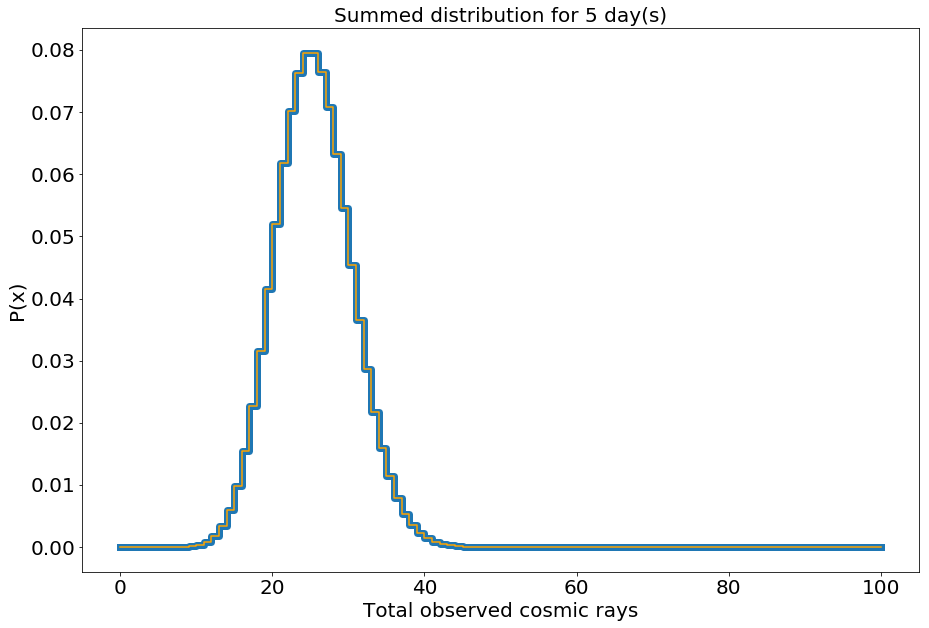

In [9]:
fig, ax = plt.subplots(1, 1)
x, pmf = conv_poi(5, False)
plt.step(x, pmf, where='post', linewidth='7')
plt.step(x, stats.poisson.pmf(x, 25), where='post', color='orange')
plt.tick_params(labelsize = 20)
plt.title('Summed distribution for 5 day(s)', fontsize = 20)
plt.xlabel('Total observed cosmic rays', fontsize = 20)
plt.ylabel('P(x)', fontsize = 20)
plt.show()

**C)** Below is a series of graphs showing how the PMF changes as days are averaged. The distribution gets tighter and tighter towards the mean of 5, and probability for floating numbers become to increase. 

The change in distribution is a great example of central limit theorm. As we sum and average more and more samples, the distribution will continuely converge towards the mean. The distribution also becomes more and more symmetric across the mean and Gaussian-like.

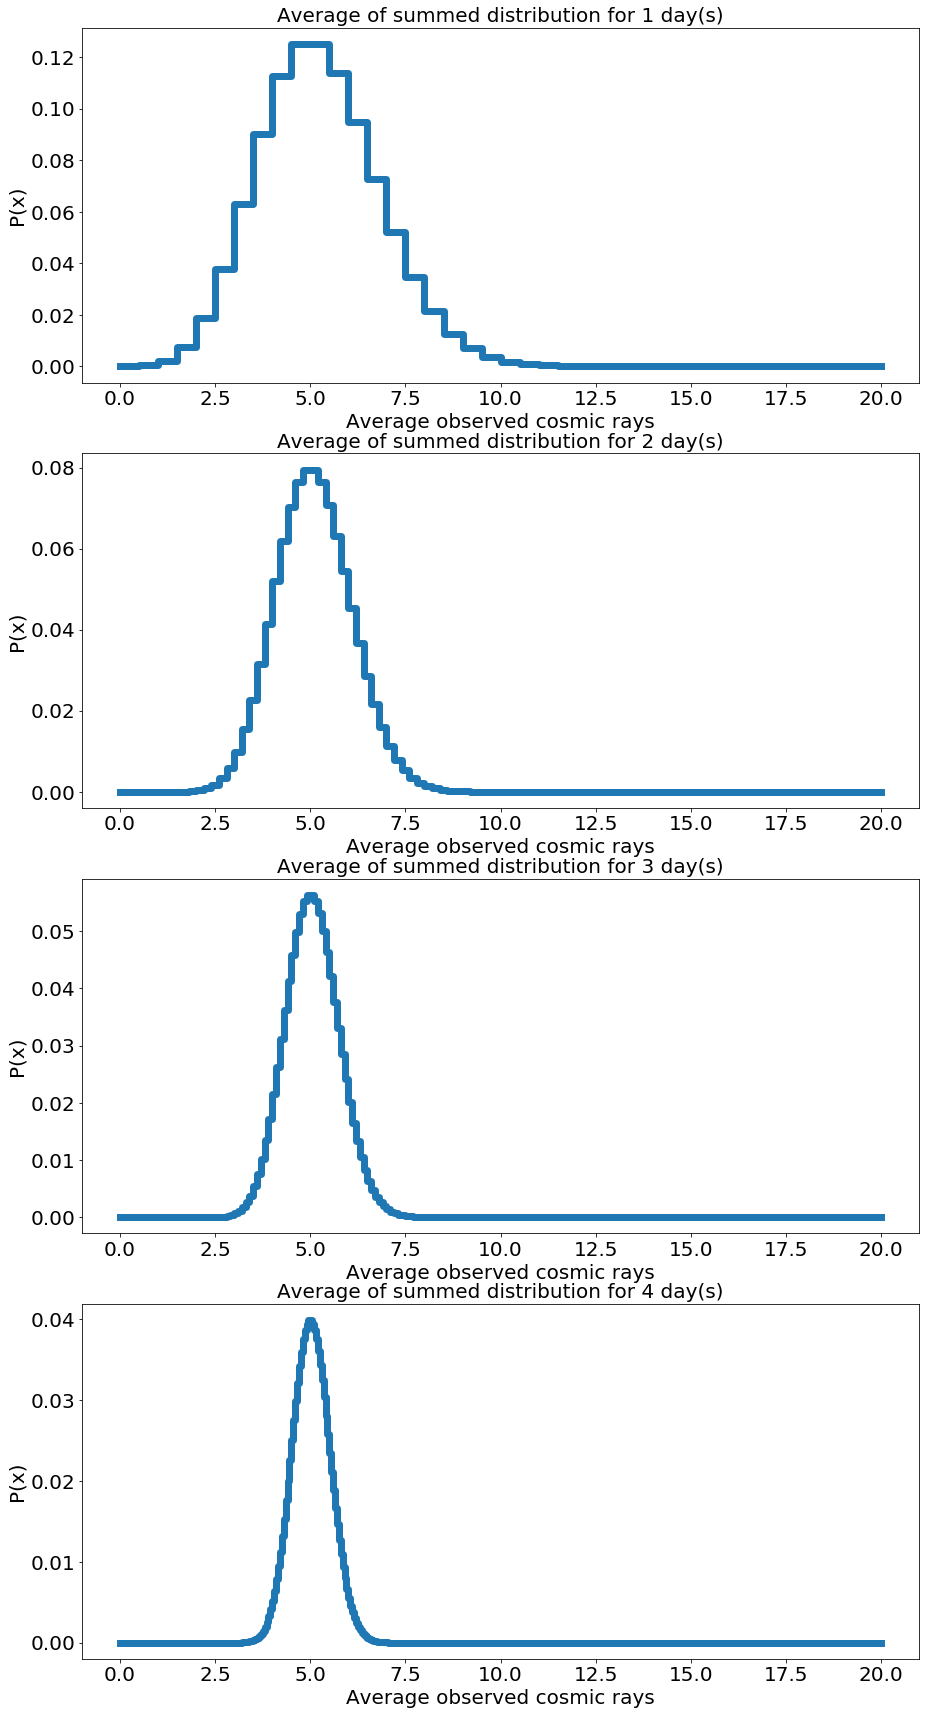

In [10]:
days = [2, 5, 10, 20]
fig, ax = plt.subplots(4,figsize=(15,30))
for i in range(len(days)):
    x, pmf = conv_poi(days[i], True)
    ax[i].step(x, pmf, where='post', linewidth='7')
    ax[i].tick_params(labelsize = 20)
    ax[i].set_title('Average of summed distribution for ' + str(i+1) + ' day(s)', fontsize = 20)
    ax[i].set_xlabel('Average observed cosmic rays', fontsize = 20)
    ax[i].set_ylabel('P(x)', fontsize = 20)
plt.show()

**D)** Within the same assumption, say for 10 days, I found an average of 8 gamma-rays per day, resulting in a total of 80 gamma-ray readings. 

In [11]:
obs = 8
prob = stats.poisson.cdf(8*10, 5*10)
sigma = stats.norm.ppf(prob)
print('Probability is ' + str(1 - prob) + ', and sigma is ' + str(sigma))

Probability is 3.435838121612633e-05, and sigma is 3.980685685222629


## Problem 2

Below are a series of graphs showing how Rayleigh distribution behaves as more and more observations are summed and averaged. Again we can see the central limit theorm at work, as the distribution becomes more and more symmetric and converging to a mean. Looking at the shape, it does seem that as number of observations increase, Rayleigh distribution does approach a Gaussian, but it's hard to tell exactly after how many intervals.

In [12]:
def conv_ray(n):
    x = np.linspace(0, 10, 101)
    base = stats.rayleigh.pdf(x, 0, 10)
    for i in range(n-1):
        base = np.convolve(base, stats.rayleigh.pdf(x, 0, 1))
    x = np.linspace(0, 10, (100*n)+1)
    return x, base

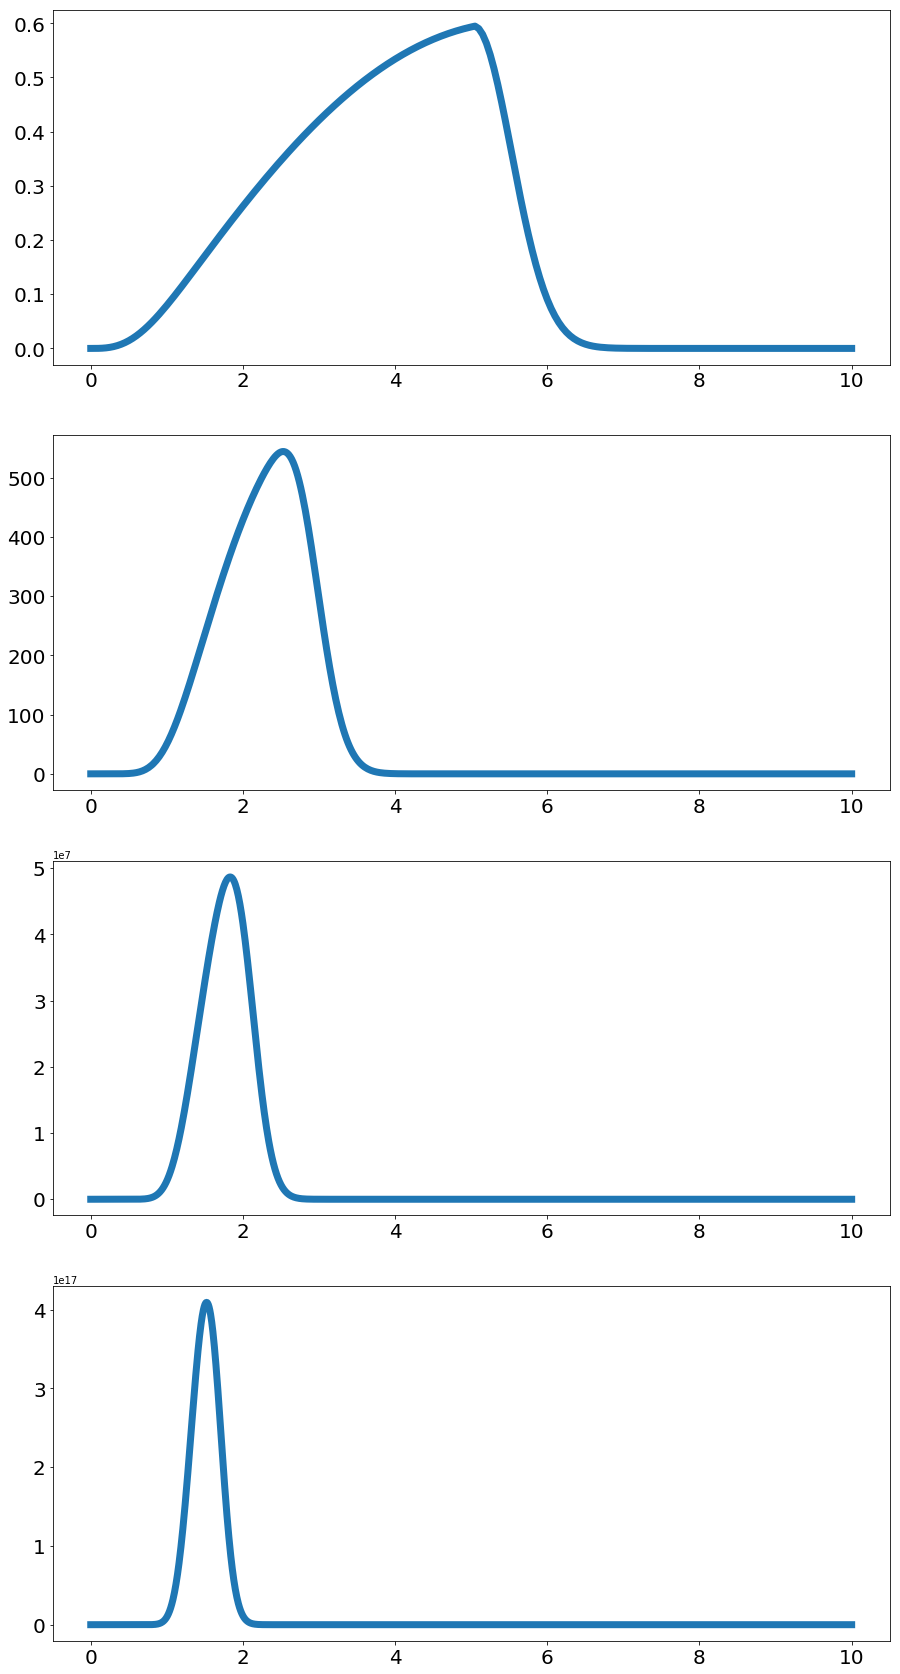

In [13]:
days = [2, 5, 10, 20]
fig, ax = plt.subplots(4,figsize=(15,30))
for i in range(len(days)):
    x, pdf = conv_ray(days[i])
    ax[i].plot(x, pdf, linewidth='7')
    ax[i].tick_params(labelsize = 20)
plt.show()

## Problem 3

Now we'll try to analyze gravity wave signal from a Neutron star merger. Using an optical telescope with a thermal noise background, we obtain from the CCD reading a pixel resembling a zero-mean Gaussian with a constant width of **5** over the image.

### Version 1

Thanks to SWIFT, I was able to obtain the reading of a precise pixel. And from the reading, I detected a signal of strength 23.54, so what's the significance of my detection? And is it significant enough?

In [14]:
x = np.linspace(-50, 50, 1000)
dist = stats.norm.pdf(x, 0, 5)
prob = stats.norm.cdf(23.54, 0, 5)
sigma = stats.norm.ppf(prob, 0, 1)
print('The sigma of my signal is ' + str(sigma) + ', which is less than 5 sigma, and hence not significant enough.')

The sigma of my signal is 4.707999999994111, which is less than 5 sigma, and hence not significant enough.


### Version 2

Our reading no longer comes from SWIFT, so instead we have an image of 10k pixels. What does my probability distribution look like now, and how did the significance of my previously detection 23.54 signal change?

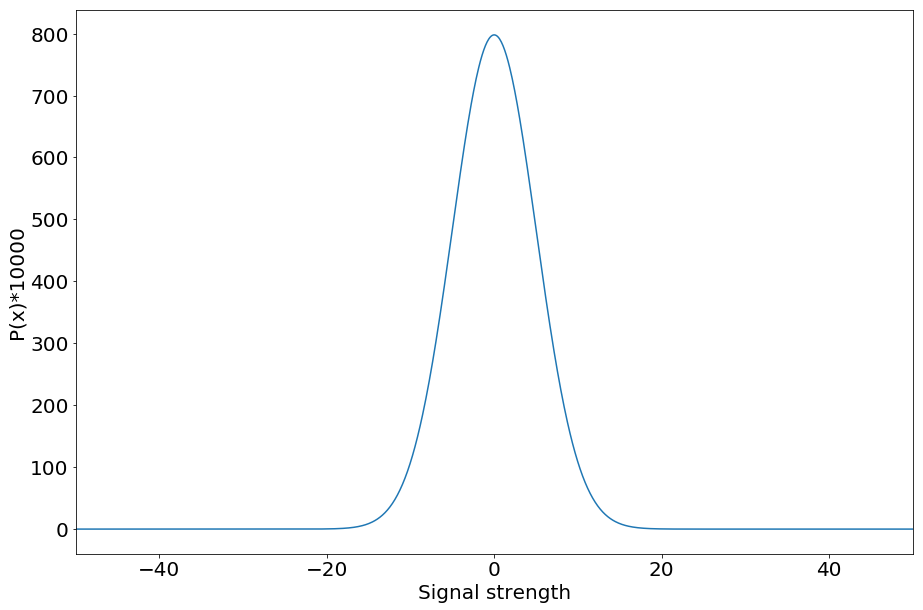

The new sigma is 2.2411569526560045, so my signal has become even less significant.


In [17]:
x = np.linspace(-50, 50, 1000)
dist = stats.norm.pdf(x, 0, 5)
plt.xlim([-50, 50])
plt.plot(x, dist*10000)
plt.tick_params(labelsize = 20)
plt.xlabel('Signal strength', fontsize = 20)
plt.ylabel('P(x)*10000', fontsize = 20)
plt.show()
prob = stats.norm.cdf(23.54, 0, 5)
sigma = stats.norm.ppf(1 - ((1 - prob)*10000), 0, 1)
print('The new sigma is ' + str(sigma) + ', so my signal has become even less significant.')

## Problem 4

Let's take another look at how the previous problem and see how trials factor affect our significance. The trials factor is the phenomenon that an observation changes due to the size of paramterer space and sample observed.

Below is the signal required for a 5 sigma detection in both versions, as well as the ratio between the two.

In [18]:
fiveSig = 1 -  stats.norm.cdf(5, 0, 1)
ver1 = stats.norm.ppf(1 - fiveSig, 0, 5)
ver2 = stats.norm.ppf(1 - (fiveSig/10000), 0, 5)
print('In version 1, the brightness of signal required for 5-sigma detection is ' + str(ver1))
print('In verison 2, the brightness of signal required for 5-sigma detection is ' + str(ver2))
print('In order words, the signal needs to be about ' + str(round(ver2/ver1, 3)) + 
      ' times brighter to be significant enough for trial factor of 10k.')

In version 1, the brightness of signal required for 5-sigma detection is 24.99999999985088
In verison 2, the brightness of signal required for 5-sigma detection is 32.752687434458274
In order words, the signal needs to be about 1.31 times brighter to be significant enough for trial factor of 10k.


The change due to the trials factor is quite small, considering we increased our samples by a magnitude of 5. Looking at the probability distributions, we can see that shape of the Gaussian is almost unchanged. I think this is because we are only scaling the height by a factor, and not convolving it.

Looking at different magnitudes for the number for the number of trials, it seems that even with such significant increases, the sensitivity penality increases by very little. At 10e10 trials, the numbers are probably too small for the machine to handle, causing the calcluation to break.

In [19]:
for i in [2, 4, 6, 9, 10]:
    newSig = stats.norm.ppf(1-(fiveSig/(10**i)), 0, 5)
    print('At 10e' + str(i) + ' trials, trial factor is ' + str(newSig/ver1))

At 10e2 trials, trial factor is 1.1648729092269157
At 10e4 trials, trial factor is 1.3101074973861455
At 10e6 trials, trial factor is 1.4413362870671322
At 10e9 trials, trial factor is 1.6153142008356598
At 10e10 trials, trial factor is inf
